# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Benevito Kevin Sebastian Hariandja
- **Email:** mc325d5y0757@student.devacademy.id
- **ID Dicoding:** BENEVITO KEVIN SEBASTIAN HARIANDJA

## Menentukan Pertanyaan Bisnis

1. Wilayah mana yang memiliki customer dan seller terbanyak?
    - Apakah terdapat konsentrasi tertentu pada kota atau provinsi tertentu?
    - Kenapa terjadi konsentrasi tersebut?
2. Bagaimana sebaran harga dan nilai pengangkutan barang?
    - Bagaimana variasi nilai pengangkutan barang berdasarkan harga?
    - Apakah ada korelasi antara nilai pengakutan dan harga?
3. Seberapa akurat algoritma waktu estimasi pengiriman sampai?
    - Berapa rata-rata deviasi antara waktu estimasi dan waktu aktual pengiriman?
    - Apakah ada pola keterlambatan?

## Import Semua Packages/Library yang Digunakan

In [42]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from matplotlib.lines import Line2D

from geobr import read_state
from geobr import read_municipality

## Data Wrangling

### Gathering Data

In [43]:
# Dataframe untuk pertanyaan no 1
customers_df = pd.read_csv("data/customers_dataset.csv")
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
sellers_df = pd.read_csv("data/sellers_dataset.csv")

# Gabungkan customers_df dan geolocation_df dengan left join
df1 = pd.merge(
    left=customers_df,
    right=geolocation_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)

# Gabungkan sellers_df dan geolocation_df dengan right join
df2 = pd.merge(
    left=geolocation_df,
    right=sellers_df,
    how="right",
    left_on="geolocation_zip_code_prefix",
    right_on="seller_zip_code_prefix"
)

# Dataframe untuk pertanyaan no 2
df3 = pd.read_csv("data/order_items_dataset.csv")

# Dataframe untuk pertanyaan no 3
df4 = pd.read_csv("data./orders_dataset.csv")


### Insight
- customers_dataset/sellers_dataset dan geolocation_dataset memiliki kolom zip_code. Hal ini memungkinkan operasi join untuk kedua dataframe agar dapat dipetakan menjadi satu plot peta brazil
- Order_items_dataset dan orders_dataset memiliki kolom order_id yang bisa digunakan sebagai cross reference antara keduannya

### Assessing Data

#### Pertanyaan 1:

In [44]:
# Cek missing data df1
df1.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
geolocation_zip_code_prefix    278
geolocation_lat                278
geolocation_lng                278
geolocation_city               278
geolocation_state              278
dtype: int64

In [45]:
# Print tipe data df1
print(df1.dtypes)

customer_id                     object
customer_unique_id              object
customer_zip_code_prefix         int64
customer_city                   object
customer_state                  object
geolocation_zip_code_prefix    float64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


In [46]:
# Cek value apa yang unik sebelum dataframe di merge untuk dijadikan tumpuan saat cleaning data
# Duplikat pada kolom customer_id
check = customers_df["customer_id"].duplicated().any()
print("Apakah ada duplikat di kolom customer_id: ", check)

# Duplikat pada kolom customer_unique_id
check = customers_df["customer_unique_id"].duplicated().any()
print("Apakah ada duplikat di kolom customer_unique_id: ", check)

# Duplikat pada kolom customer_unique_id
check = sellers_df["seller_id"].duplicated().any()
print("Apakah ada duplikat di kolom seller_id: ", check)


Apakah ada duplikat di kolom customer_id:  False
Apakah ada duplikat di kolom customer_unique_id:  True
Apakah ada duplikat di kolom seller_id:  False


In [47]:
# Cek df1
df1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...,...
15083728,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.599369,-46.905603,cotia,SP
15083729,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.593577,-46.910112,cotia,SP
15083730,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.584425,-46.892014,cotia,SP
15083731,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,6703.0,-23.595022,-46.918546,cotia,SP


In [48]:
# Cek missing data df2
df2.isnull().sum()

geolocation_zip_code_prefix    7
geolocation_lat                7
geolocation_lng                7
geolocation_city               7
geolocation_state              7
seller_id                      0
seller_zip_code_prefix         0
seller_city                    0
seller_state                   0
dtype: int64

In [49]:
# Print tipe data df2
print(df2.dtypes)

geolocation_zip_code_prefix    float64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
seller_id                       object
seller_zip_code_prefix           int64
seller_city                     object
seller_state                    object
dtype: object


In [50]:
# Cek df2
df2

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,13023.0,-22.898536,-47.063125,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,13023.0,-22.895499,-47.061944,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
2,13023.0,-22.891740,-47.060820,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
3,13023.0,-22.895762,-47.066144,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
4,13023.0,-22.896154,-47.062431,campinas,SP,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
...,...,...,...,...,...,...,...,...,...
435089,12051.0,-23.011130,-45.592347,taubate,SP,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP
435090,12051.0,-23.013452,-45.584299,taubaté,SP,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP
435091,12051.0,-23.009155,-45.592019,taubate,SP,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP
435092,12051.0,-23.009019,-45.584925,taubate,SP,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


#### Pertanyaan 2:

In [51]:
# Cek missing data df2
df3.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [52]:
# Print tipe data df2
print(df3.dtypes)

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


In [53]:
# Cek df3
df3

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


#### Pertanyaan 3:

In [54]:
# Cek missing data df4
df4.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [55]:
# Cek data type df4
print(df4.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


In [56]:
# Cek df4
df4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [57]:
df4["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

### Insight
- DF1 dan DF2 memiliki banyak duplikasi dari operasi merge tabel customers_dataset/sellers_dataset dengan geolocation_dataset. Ini terjadi karena ada banyak value zip_code_prefix yang sama sehingga merge menyatukan data tersebut dengan yang lainnya. Pembersihan datanya dapat menggunakan customer_id untuk DF1 dan DF2 dapat menggunakan sellers_id karena semua value-nya unik sehingga dapat digunakan untuk drop row duplikat
- DF3 tidak memiliki missing value dari file csv yang dimuat dan datanya dapat langsung di explore dengan pembersihan data yang minimal
- DF4 banyak memiliki missing data karena ada berbagai kondisi yang dapat terjadi (tidak diproses, tidak dikirim, dll) dan value timestampnya tidak menggunakan format waktu oleh karena itu data harus di ubah ke format datetime64 agar perhitungan dapat dilakukan untuk data tersebut

### Cleaning Data

#### Pertanyaan 1:

In [58]:
# Bersihkan data duplikat dengan drop row dan gunakan customer_id dan seller_id sebagai kunci uniknya
df1.drop_duplicates(subset=["customer_id"], inplace=True)
df2.drop_duplicates(subset=["seller_id"], inplace=True)

# Drop kolom yang tidak diperlukan
df1.drop(columns=["customer_id", "customer_unique_id", "customer_zip_code_prefix", "customer_city", "customer_state"], inplace=True)
df2.drop(columns=["seller_id", "geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], inplace=True)

df1.to_csv("dashboard/geoloc_customer.csv", index=False)
df2.to_csv("dashboard/geoloc_seller.csv", index=False)

# Ubah data pandas ke geopandas untuk kedua dataframe agar dapat dipanggil sendiri sendiri untuk visualisasi dan nanti bisa digabungkan
geometry1 = [Point(xy) for xy in zip(df1["geolocation_lng"], df1["geolocation_lat"])]
gdf1 = gpd.GeoDataFrame(df1, geometry=geometry1, crs="EPSG:4674")

geometry2 = [Point(xy) for xy in zip(df2["geolocation_lng"], df2["geolocation_lat"])]
gdf2 = gpd.GeoDataFrame(df2, geometry=geometry2, crs="EPSG:4674")

# Inisialisasi gambar peta negara brazil dengan tahun yang sama pada waktu terakhir pencatatan data
brazil_state = read_state(year=2018).to_crs("EPSG:4674")

# Karena ada data customer dari luar brazil, potong petanya ke negara brazil saja agar outlier tidak di tampilkan sehingga peta tidak tampil kecil
gdf1 = gdf1.clip(brazil_state)
gdf2 = gdf2.clip(brazil_state)


#### Pertanyaan 2:

In [59]:
# Drop kolom yang tidak diperlukan
df3 = df3[["price", "freight_value"]]


#### Pertanyaan 3:

In [60]:
# Drop kolom yang tidak diperlukan
df4 = df4[["order_status", "order_delivered_customer_date", "order_estimated_delivery_date"]]

# Bersihkan missing value df4 dengan drop row dengan kriteria:
# 1. status pengirimannya tidak "delivered" pada kolom "order_status"
# 2. missing value di order_delivered_customer_date
df4 = df4.loc[
    (df4["order_status"] == "delivered") & df4["order_delivered_customer_date"].notna()
]

# Ubah value order_purchase_timestamp dari datatype object ke datetime64
df4[["order_delivered_customer_date", "order_estimated_delivery_date"]] = df4[
    ["order_delivered_customer_date", "order_estimated_delivery_date"]
].apply(pd.to_datetime)

# Simpan dataframe ke csv untuk dashboard
df4.to_csv("dashboard/orders_date.csv", index=False)


#### Insight
- Data pada dataset customer_dataset memuat outlier yaitu customer yang berbelanja dari di luar Brazil
- Untuk menghidari adanya missing value pada DF4 ada beberapa kriteria yang harus di di ikuti. Berdasarkan data yang dimuat jika status_order sudah "delivered" dan menunjukan order_delivered_customer_date, berarti pesanan sudah sampai ke tangan pembeli. Hal ini bisa digunakan untuk membuat perhitungan akurasi algortima estimasi e-commerce

## Exploratory Data Analysis (EDA)

### Explore ...

#### Pertanyaan 1:

In [61]:
# Hitung berapa banyak negara bagian
unique_count = df1["geolocation_state"].nunique()
print("Jumlah negara bagian:", unique_count)

# Hitung berapa banyak customer di setiap negara bagian
df1["geolocation_state"].value_counts()

Jumlah negara bagian: 27


geolocation_state
SP    41731
RJ    12839
MG    11624
RS     5462
PR     5034
SC     3637
BA     3371
ES     2027
GO     2011
DF     1969
PE     1648
CE     1332
PA      972
MT      905
MA      743
MS      715
PB      534
PI      492
RN      483
AL      412
SE      349
TO      279
RO      251
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

In [62]:
# Hitung geolocation
df1["geolocation_city"].value_counts()

geolocation_city
sao paulo         13207
rio de janeiro     6873
belo horizonte     2773
são paulo          2331
curitiba           1521
                  ...  
arapua                1
jampruca              1
água preta            1
tamboara              1
berizal               1
Name: count, Length: 4200, dtype: int64

In [63]:
# Hitung berapa banyak seller di setiap negara bagian
df2["seller_state"].value_counts()

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

In [64]:
# Hitung customer di setiap kota
df2["seller_city"].value_counts()

seller_city
sao paulo                                 694
curitiba                                  127
rio de janeiro                             96
belo horizonte                             68
ribeirao preto                             52
                                         ... 
ipua                                        1
muqui                                       1
timoteo                                     1
pouso alegre                                1
rio de janeiro, rio de janeiro, brasil      1
Name: count, Length: 611, dtype: int64

In [65]:
brazil_state

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.89216 -12.85884, -62.89661..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.08554 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-69.61341 -2.44025, -69.53446 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.97805 2.46754, -63.98266 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-46.38475 -1.03633, -46.38986 ..."
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-53.27918 2.18599, -53.27655 2..."
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.14665 -13.15201, -48.15796..."
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.48155 -2.7266, -44.47725 -..."
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91539 -6.64607, -42.91722 ..."
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-38.79615 -3.53504, -38.79911 ..."


In [66]:
gdf1

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
6827222,97560.0,-30.391330,-56.451258,quarai,RS,POINT (-56.45126 -30.39133)
14124636,97560.0,-30.391330,-56.451258,quarai,RS,POINT (-56.45126 -30.39133)
11433345,97560.0,-30.391330,-56.451258,quarai,RS,POINT (-56.45126 -30.39133)
14240692,97560.0,-30.391330,-56.451258,quarai,RS,POINT (-56.45126 -30.39133)
8821625,97509.0,-29.795944,-57.063217,uruguaiana,RS,POINT (-57.06322 -29.79594)
...,...,...,...,...,...,...
2450258,58102.0,-7.037519,-34.842502,cabedelo,PB,POINT (-34.8425 -7.03752)
8833615,58102.0,-7.037519,-34.842502,cabedelo,PB,POINT (-34.8425 -7.03752)
6236231,58103.0,-6.985233,-34.829671,cabedelo,PB,POINT (-34.82967 -6.98523)
2137594,58103.0,-6.985233,-34.829671,cabedelo,PB,POINT (-34.82967 -6.98523)


In [67]:
gdf2

,geolocation_lat,geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,geometry
332180,-32.079513,-52.157678,96203,rio grande,RS,POINT (-52.15768 -32.07951)
275887,-31.772413,-52.343992,96020,pelotas,RS,POINT (-52.34399 -31.77241)
195671,-31.772413,-52.343992,96020,pelotas,RS,POINT (-52.34399 -31.77241)
434928,-31.744231,-52.328761,96080,pelotas,RS,POINT (-52.32876 -31.74423)
269149,-31.321519,-54.100784,96400,bage,RS,POINT (-54.10078 -31.32152)
...,...,...,...,...,...,...
24390,-3.759210,-38.566686,60440,fortaleza,CE,POINT (-38.56669 -3.75921)
226005,-3.743988,-38.519790,60110,fortaleza,CE,POINT (-38.51979 -3.74399)
113288,-3.723672,-38.591789,60346,fortaleza,CE,POINT (-38.59179 -3.72367)
244885,-3.723306,-38.527235,60025,fortaleza,CE,POINT (-38.52724 -3.72331)


#### Pertanyaan 2:

In [68]:
df3

,price,freight_value
0,58.90,13.29
1,239.90,19.93
2,199.00,17.87
3,12.99,12.79
4,199.90,18.14
...,...,...
112645,299.99,43.41
112646,350.00,36.53
112647,99.90,16.95
112648,55.99,8.72


In [69]:
df3.describe(include="all")

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [70]:
df3[["price", "freight_value"]].corr()

,price,freight_value
price,1.000000,0.414204
freight_value,0.414204,1.000000


In [71]:
# Simpan dataframe ke csv untuk dashboard
df3.to_csv("dashboard/price.csv", index=False)

#### Pertanyaan 3:

In [72]:
# Kalkulasikan waktu antara order diterima dengan waktu estimasi
df4["delivery_accuracy"] = (df4["order_delivered_customer_date"] - df4["order_estimated_delivery_date"]).dt.days

# Fungsi untuk menentukan kategori akurasi
def clasification(hari):
    if hari == 0:
        return "Tepat waktu"
    elif 0 < hari <= 3:
        return "Sedikit terlambat"
    elif hari > 3:
        return "Sangat terlambat"
    elif -3 <= hari < 0:
        return "Lebih awal"
    else:
        return "Sangat awal"

# Panggil fungsi klasifikasi dengan input delivery_accuracy
df4.loc[:, "accuracy_cluster"] = df4["delivery_accuracy"].apply(clasification)

# Print berapa banyak data di setiap kategori
print(df4["accuracy_cluster"].value_counts())


accuracy_cluster
Sangat awal          83901
Lebih awal            4743
Sangat terlambat      4664
Sedikit terlambat     1870
Tepat waktu           1292
Name: count, dtype: int64


In [73]:
df4

,order_status,order_delivered_customer_date,order_estimated_delivery_date,delivery_accuracy,accuracy_cluster
0,delivered,2017-10-10 21:25:13,2017-10-18,-8,Sangat awal
1,delivered,2018-08-07 15:27:45,2018-08-13,-6,Sangat awal
2,delivered,2018-08-17 18:06:29,2018-09-04,-18,Sangat awal
3,delivered,2017-12-02 00:28:42,2017-12-15,-13,Sangat awal
4,delivered,2018-02-16 18:17:02,2018-02-26,-10,Sangat awal
...,...,...,...,...,...
99436,delivered,2017-03-17 15:08:01,2017-03-28,-11,Sangat awal
99437,delivered,2018-02-28 17:37:56,2018-03-02,-2,Lebih awal
99438,delivered,2017-09-21 11:24:17,2017-09-27,-6,Sangat awal
99439,delivered,2018-01-25 23:32:54,2018-02-15,-21,Sangat awal


In [74]:
# Filter data: Only include delivery_accuracy < -3
filtered_data = df4[df4["delivery_accuracy"] < -3]
filtered_data_nsort = filtered_data["delivery_accuracy"].value_counts()

filtered_data_nsort

delivery_accuracy
-14     7126
-13     5963
-15     5345
-7      4837
-8      4828
        ... 
-84        1
-76        1
-124       1
-63        1
-67        1
Name: count, Length: 79, dtype: int64

In [75]:
filtered_data_sort = filtered_data["delivery_accuracy"].value_counts().sort_index()

filtered_data_sort

delivery_accuracy
-147       1
-140       1
-135       1
-124       1
-109       1
        ... 
-8      4828
-7      4837
-6      3625
-5      2219
-4      1917
Name: count, Length: 79, dtype: int64

In [76]:
# Simpan dataframe untuk dashboard
df4.to_csv("dashboard/orders_date.csv", index=False)

### Insight
- Pada DF1 dan DF2 terlihat top 3 dari banyaknya customer ada di kota madya SP, RJ, dan MG. Untuk seller top 3-nya ada pada kota madya SP, PR, dan MJ. Jika digambungkan semuannya, plot peta pesebaran dapat di buat untuk 4 kota madya tersebut
- DF3 menunjukan korelasi yang baik antara price dan freight_value
- Banyak data DF4 yang masuk kategori sangat awal

## Visualization & Explanatory Analysis

### Pertanyaan 1:

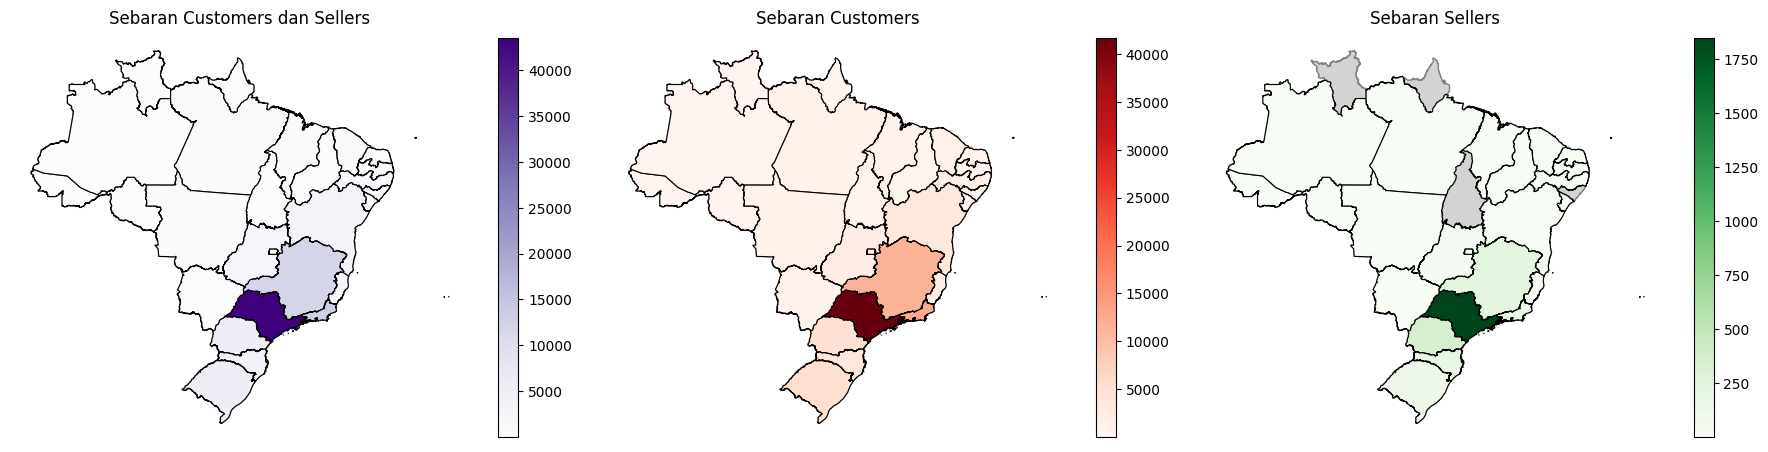

In [77]:
# Fungsi untuk membuat peta choropleth
def choropleth(ax, gdf, column, title, cmap):
    brazil_state.plot(ax=ax, color="lightgrey", edgecolor="grey")
    gdf.plot(column=column, 
             cmap=cmap, 
             linewidth=0.8, 
             edgecolor="black", 
             legend_kwds={"shrink": 0.7},
             legend=True, 
             ax=ax)
    ax.set_title(title, fontsize=12)
    ax.set_axis_off()

# Hitung berapa banyak customer dan seller di setiap negara bagian 
customer_count = df1["geolocation_state"].value_counts().reset_index()
customer_count.columns = ["abbrev_state", "customer_count"]

seller_counts = df2["seller_state"].value_counts().reset_index()
seller_counts.columns = ["abbrev_state", "seller_count"]

# Merge customer dan seller dengan kode kota
brazil_state = brazil_state.merge(customer_count, on="abbrev_state", how="left")
brazil_state = brazil_state.merge(seller_counts, on="abbrev_state", how="left")

# Hitung total keseluruhan count
brazil_state["total_count"] = brazil_state["customer_count"] + brazil_state["seller_count"].fillna(0)

# Buat subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot customer dan seller
choropleth(axes[0], brazil_state, "total_count", "Sebaran Customers dan Sellers", "Purples")

# Plot customer saja
choropleth(axes[1], brazil_state, "customer_count", "Sebaran Customers", "Reds")

# Plot seller saja
choropleth(axes[2], brazil_state, "seller_count", "Sebaran Sellers", "Greens")

plt.tight_layout()
plt.show()



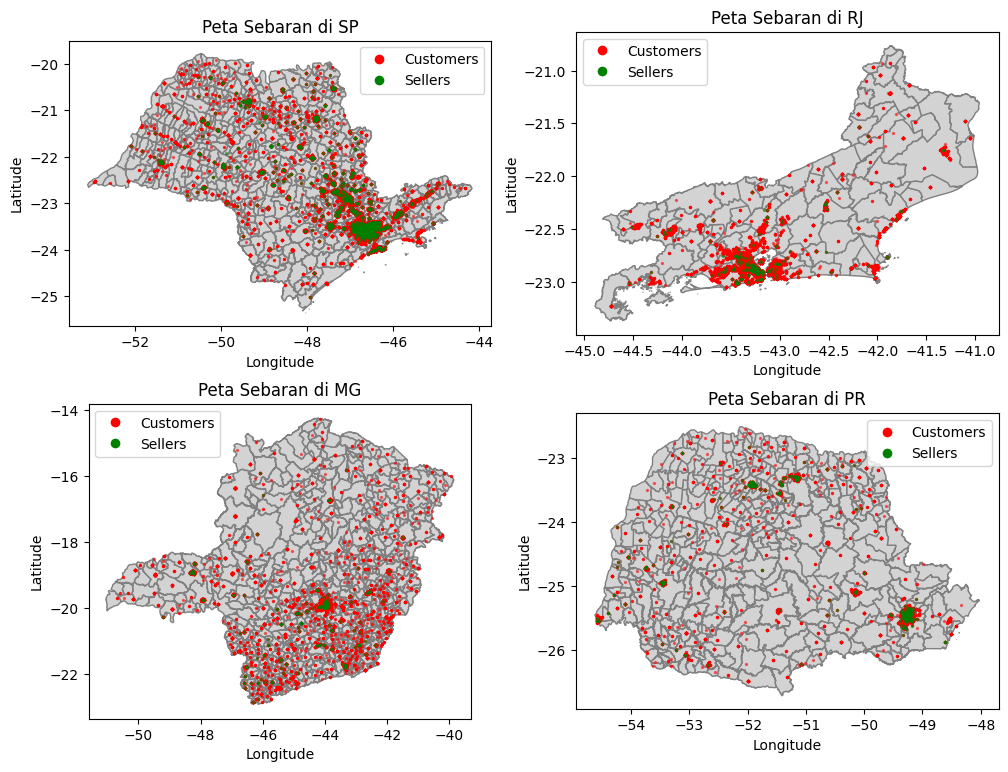

In [78]:
# Masukan kode kota yang ingin ditampilkan
code = ["SP", "RJ", "MG", "PR"]

# Kode kota akan di iterasikan dan peta akan di load untuk semua variable code
municipalities = {state: read_municipality(code_muni=state, year=2018) for state in code}

# Data dari geopandas akan di spatial join kan agar visualisasi dapat fokus ke wilayah tersebut saja
# Hal ini dilakukan untuk geopandas dataframe customer dan seller
gdfs_c = {state: gpd.sjoin(gdf1, municipalities[state], predicate="intersects") for state in code}
gdfs_s = {state: gpd.sjoin(gdf2, municipalities[state], predicate="intersects") for state in code}

# Bua subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Tambahkan keterangan marker peta
legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Customers'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Sellers')
]

# Tambahkan label longitude dan latitude pada plot dan gunakan flatten untuk menjadikan setiap baris array 1 dimensi
for i, (state, ax) in enumerate(zip(code, axes.flatten())):
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        municipalities[state].plot(ax=ax, color="lightgrey", edgecolor="grey")
        gdfs_c[state].plot(ax=ax, markersize=2, color="red", alpha=0.5)
        gdfs_s[state].plot(ax=ax, markersize=2, color="green", alpha=0.5)
        ax.legend(handles=legend, loc="upper left" if i in [1, 2] else "upper right")
        ax.set_title(f"Peta Sebaran di {state}")

plt.show()

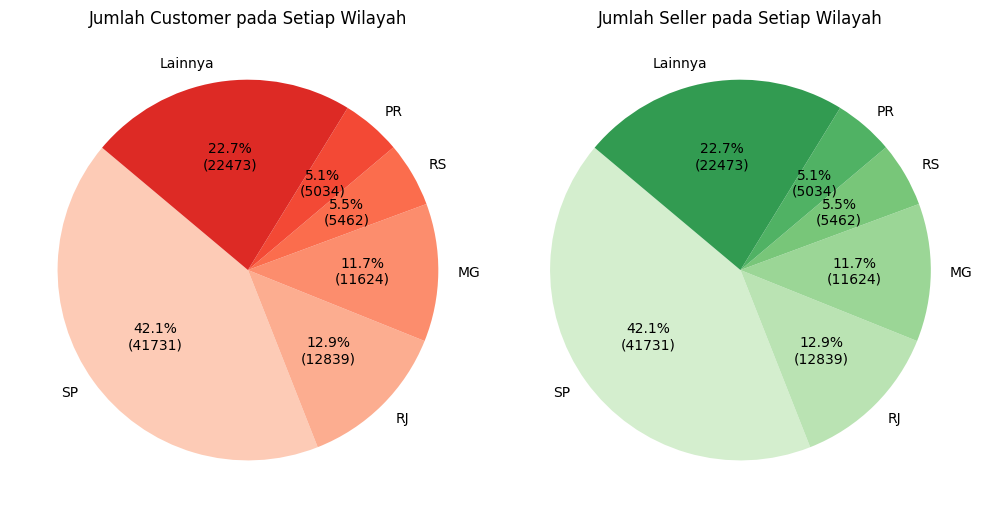

In [79]:
# Fungsi format label menjadi persentase
def percent(pct, total):
    # Gunakan pembulatan agar hasil pembagian tidak jadi pecahan
    value = round(pct / 100 * total)

    # Return dengan string kosong jika persentase kurang dari 4 untuk menghindari label yang tertimpa
    return f"{pct:.1f}%\n({value})" if pct >= 4 else ""

# Fungsi untuk menggabungkan bagian yang terkecil menjadi satu bagian yaitu "Lainnya"
def group(value_counts):
    total = value_counts.sum()
    percentages = value_counts / total * 100

    # Pisahkan menjadi kategori besar dan kecil
    # >= 4% termasuk kategori besar
    # < 4% termasuk kategori kecil 
    large_cat = value_counts[percentages >= 4]
    small_cat = value_counts[percentages < 4]

    # Gabungkan menjadi satu kategori dengan nama "Lainnya" jika masuk ke small_categories
    if not small_cat.empty:
        large_cat["Lainnya"] = small_cat.sum()

    return large_cat

# Hitung customer dan seller
count_customers_state = df1["geolocation_state"].value_counts()
count_seller_state = df1["geolocation_state"].value_counts()

# Masukan value yang telah didapat untuk dikategorikan
group_customer = group(count_customers_state)
group_seller = group(count_seller_state)

# Buat 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Chart untuk customer
axes[0].pie(
    group_customer, 
    labels=group_customer.index,  
    autopct=lambda pct: percent(pct, group_customer.sum()),  
    colors=plt.cm.Reds(range(50, 250, 25)), 
    startangle=140
)
axes[0].set_title("Jumlah Customer pada Setiap Wilayah")

# Chart untuk seller
axes[1].pie(
    group_seller, 
    labels=group_seller.index,  
    autopct=lambda pct: percent(pct, group_seller.sum()),  
    colors=plt.cm.Greens(range(50, 250, 25)), 
    startangle=140
)
axes[1].set_title("Jumlah Seller pada Setiap Wilayah")

plt.tight_layout()
plt.show()


### Pertanyaan 2:

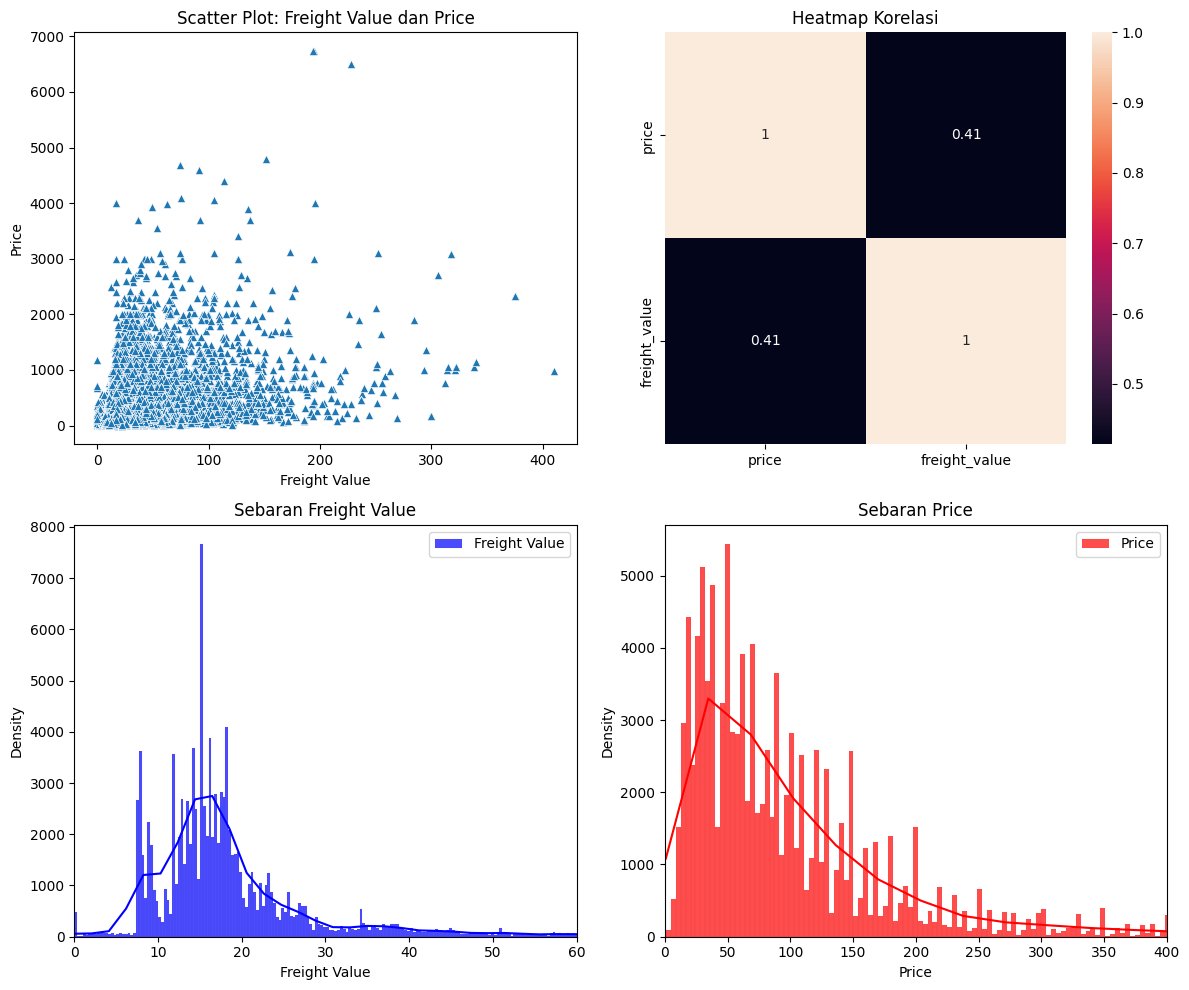

In [80]:
# Buat subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot
sns.scatterplot(data=df3, x="freight_value", y="price", ax=axes[0, 0], marker="^")
axes[0, 0].set_title("Scatter Plot: Freight Value dan Price")
axes[0, 0].set_xlabel("Freight Value")
axes[0, 0].set_ylabel("Price")

# Heatmap korelasi
sns.heatmap(df3.corr(), annot=True, cmap="rocket", ax=axes[0, 1])
axes[0, 1].set_title("Heatmap Korelasi")

# # Sebaran freight value
sns.histplot(df3["freight_value"], kde=True, color="blue", label="Freight Value", alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_xlim(0, 60)
axes[1, 0].set_title("Sebaran Freight Value")
axes[1, 0].set_xlabel("Freight Value")
axes[1, 0].set_ylabel("Density")
axes[1, 0].legend()

# Sebaran price
sns.histplot(df3["price"], kde=True, color="red", label="Price", alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_xlim(0, 400)
axes[1, 1].set_title("Sebaran Price")
axes[1, 1].set_xlabel("Price")
axes[1, 1].set_ylabel("Density")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### Pertanyaan 3:

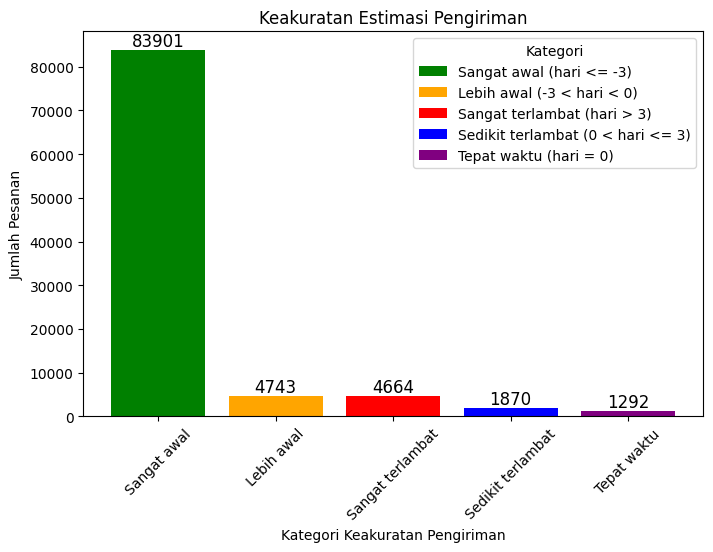

In [81]:
# Hitung value pada setiap kategori
accuracy_count = df4["accuracy_cluster"].value_counts()

# Tentukan warna bar
colors = ["green", "orange", "red", "blue", "purple"][:len(accuracy_count)]

# Buat bar plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(accuracy_count.index, accuracy_count.values, color=colors)

# Nama label x, y, dan judul chart
ax.set_xlabel("Kategori Keakuratan Pengiriman")
ax.set_ylabel("Jumlah Pesanan")
ax.set_title("Keakuratan Estimasi Pengiriman")

# Tentukan sumbu x chart 
ax.set_xticks(range(len(accuracy_count)))
ax.set_xticklabels(accuracy_count.index, rotation=45)

# Tambahkan jumlah value diatas bar plot
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, int(height), 
            ha="center", va="bottom", fontsize=12)

# Tambahkan label keterangan
legend = [
    "Sangat awal (hari <= -3)",
    "Lebih awal (-3 < hari < 0)",
    "Sangat terlambat (hari > 3)", 
    "Sedikit terlambat (0 < hari <= 3)", 
    "Tepat waktu (hari = 0)", 
]
ax.legend(bars, legend, title="Kategori")

plt.show()


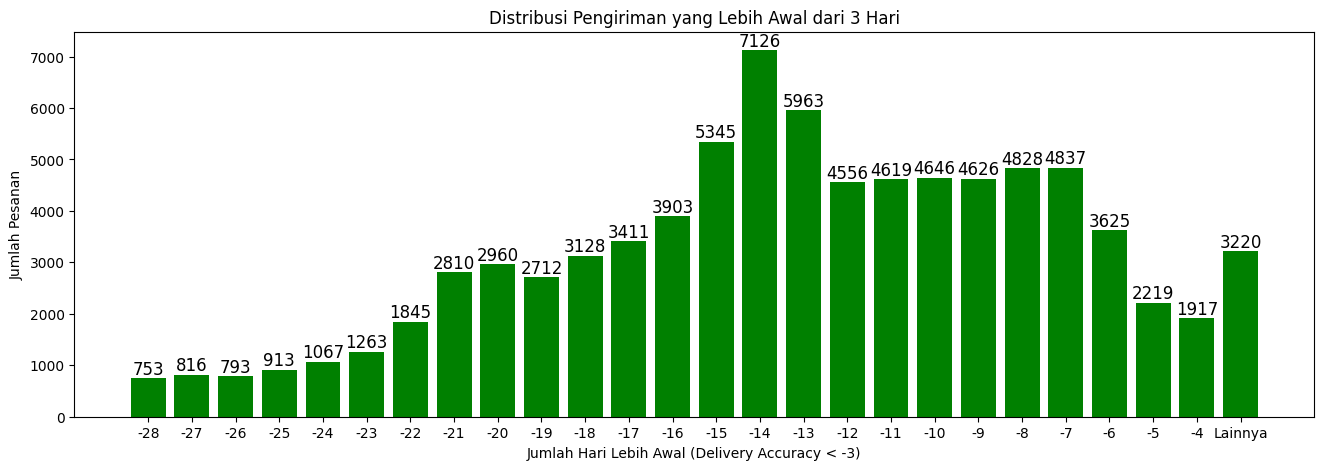

In [82]:
# Pisahkan data yang >= 500 dengan yang < 500
main_values = filtered_data_sort[filtered_data_sort >= 500]
other_values_sum = filtered_data_sort[filtered_data_sort < 500].sum()

# Merge dan tambahkan label "Lainnya" jika ada data yang kurang dari 500
if other_values_sum > 0:
    main_values["Lainnya"] = other_values_sum

# Buat chartnya
fig, ax = plt.subplots(figsize=(16, 5))
bars = ax.bar(main_values.index.astype(str), main_values.values, color="green")

# Keterangan
ax.set_xlabel("Jumlah Hari Lebih Awal (Delivery Accuracy < -3)")
ax.set_ylabel("Jumlah Pesanan")
ax.set_title("Distribusi Pengiriman yang Lebih Awal dari 3 Hari")

# Tambahkan count di atas setiap bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, int(height), 
            ha="center", va="bottom", fontsize=12)

plt.show()


### Insight
- Kebanyakan customer dan seller berada di kota besar. Jika daerah yang memiliki customer 4% dari total digabungkan, kategori lainnya ini menjadi salah satu pasar yang terbesar
- Distribusi nilai pengangkutan menunjukan rentangnnya tidak besar dan juga sangat padat. Pada distribusi harga, rentang harga pembelian lebih luas tetapi rata rata customer berbelanja produk yang murah
- Data yang masuk ke kategori sangat awal sangat banyak dibandingkan dengan kategori lain. Distribusi pengiriman yang lebih awal tercatat paling banyak di minggu 1, 2, dan 3

## Conclusion

1. Wilayah dengan Customer dan Seller Terbanyak:

    Negara bagian dengan jumlah customer dan seller terbanyak adalah Sao Paulo, diikuti oleh Rio de Janeiro, Minas Gerais, dan Parana. Customer yang berasal dari wilayah dengan jumlah pengguna di bawah 4% jika digabungkan mencapai sekitar 1/5 dari total data. Banyaknya calon pembeli di wilayah yang lebih kecil menunjukkan adanya peluang ekspansi bagi e-commerce, terutama dengan menyediakan pengiriman yang lebih cepat dan berkualitas melalui hub distribusi terdekat.

    Mayoritas seller beroperasi di kota-kota besar dengan populasi tinggi, menunjukkan bahwa mereka cenderung memilih lokasi dengan basis customer yang besar dan infrastruktur bisnis yang mendukung. Selain faktor populasi dan infrastruktur, daya beli masyarakat yang tinggi juga berkontribusi terhadap konsentrasi ini. Wilayah dengan daya beli yang baik memiliki potensi ekspansi yang tinggi, terutama dengan strategi seperti peningkatan cakupan pengiriman, promosi lokal, dan kolaborasi dengan penyedia logistik yang lebih efisien.

2. Sebaran Harga dan Nilai Pengangkutan Barang:
    
    Sebaran harga untuk pembelian dan nilai pengangkutan menunjukkan korelasi yang erat, dengan keduanya termasuk dalam kategori right-skewed. Hal ini menunjukkan bahwa sebagian besar pembelian memiliki harga dan biaya pengiriman yang relatif rendah. Sebaran nilai pengangkutan memiliki kepadatan tinggi dalam rentang kecil, sementara harga memiliki rentang yang lebih luas dengan kepadatan data yang menurun secara bertahap.

    Ini mengindikasikan bahwa meskipun sebagian besar pembelian bernilai rendah, terdapat variasi harga yang lebih besar dibandingkan dengan biaya pengangkutan. Dari pola ini, perusahaan dapat mengoptimalkan strategi harga dengan menawarkan free-shipping atau diskon untuk menarik lebih banyak pembeli, serta meningkatkan efisiensi logistik dengan memberikan fleksibilitas pengiriman, insentif untuk produk bernilai tinggi, dan meningkatkan distribusi guna meningkatkan kepuasan customer.

3. Akurasi Algoritma Estimasi Waktu Pengiriman:

    Algoritma estimasi waktu pengiriman untuk e-commerce ini masih memiliki tingkat akurasi yang kurang optimal. Dari data yang dianalisis, banyak pengiriman yang sampai lebih cepat dari estimasi, dengan pola estimasi menunjukkan bahwa pengiriman lebih cepat dari estimasi di kisaran 28 hari. Hal ini menunjukkan bahwa sistem masih perlu diperbaiki dalam memprediksi waktu kedatangan barang agar estimasi lebih realistis dan tidak terlalu konservatif.

    Untuk meningkatkan keakuratan estimasi, perusahaan dapat mengembangkan algoritma berbasis machine learning yang dilatih dengan data historis dan faktor eksternal seperti kondisi lalu lintas, cuaca, dan performa mitra logistik. Selain itu, integrasi data real-time tracking dan optimasi proses pengiriman dapat membantu meningkatkan ketepatan estimasi, sehingga memberikan pengalaman yang lebih baik bagi customer.